Chapter 5

5-1 검증 세트를 나누고 전처리 과정 학습

In [3]:
#위스콘신 유방암 데이터 세트 준비 & 훈련 데이터 세트 나누기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [4]:
#로지스틱 회귀로 모델 훈련하고 평가
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

In [5]:
#서포트 벡터 머신(SVM)으로 모델 훈련하고 평가
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

In [6]:
#검증 세트 준비
#위스콘신 유방암 데이터 세트 준비 & 훈련 데이터 세트 나누기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [7]:
#겁정 세트 분할
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


In [8]:
#검증 세트를 사용해 모델 평가
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.6923076923076923

['mean perimeter' 'mean area']


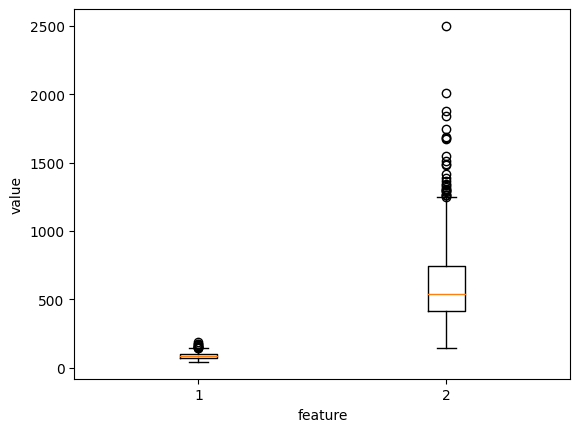

In [9]:
#훈련 데이터 준비 & 스케일 비교
import matplotlib.pyplot as plt
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [10]:
#가중치 기록 변수와 학습률 파라미터 추가
def __init__(self, learning_rate=0.1):
  self.w = None
  self.b = None
  self.losses = []
  self.w_history = []
  self.lr = learning_rate

In [11]:
import numpy as np

#가중치 기록하고 업데이트 양 조절하기
def fit(self, x, y, epochs=100): #훈련을 위한 fit() 매서드 구현
  self.w = np.ones(x.shape[1])
  self.b = 0
  self.w_history.append(self.w.copy())
  np.random.seed(42)
  for i in range(epochs):
    loss = 0
    indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞기
    for i in indexes:
      z = self.forpass(x[i])
      a = self.activation(z)
      err = -(y[i] - a)
      w_grad, b_grad = self.backprop(x[i], err)
      self.w -= w_grad
      self.b -= b_grad
      self.w_history.append(self.w.copy()) #가중치를 기록
      a = np.clip(a, 1e-10, 1-1e-10) #안전한 로그 계산을 위해 클리핑한 후 손실을 누적
      loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
    self.losses.append(loss/len(y)) #에포크마다 평균 손실을 저장

In [12]:
#단일층 신경망 구현

class SingleLayer:
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x): #정방향 계산
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err): #역방향 계산
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100): #훈련을 위한 fit() 매서드 구현
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞기
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= self.lr * w_grad
        self.b -= self.lr * b_grad
        self.w_history.append(self.w.copy()) #가중치를 기록
        a = np.clip(a, 1e-10, 1-1e-10) #안전한 로그 계산을 위해 클리핑한 후 손실을 누적
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y)) #에포크마다 평균 손실을 저장

  def predict(self, x): #예측을 위한 predict() 매서드 구현
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [13]:
#모델 훈련 & 평가
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

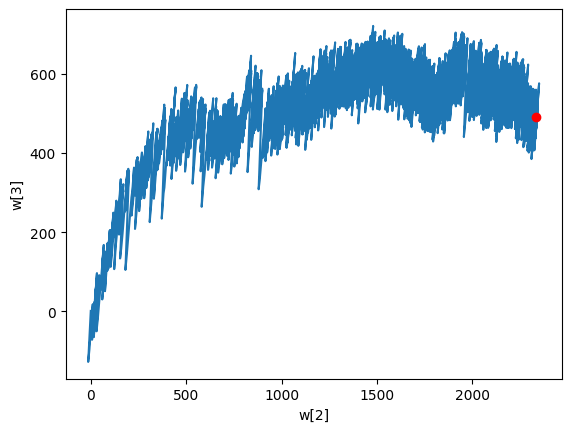

In [14]:
#mean perimeter와 mean area특성에 대한 가중치 그래프
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [15]:
#넘파이로 표준화 구현
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

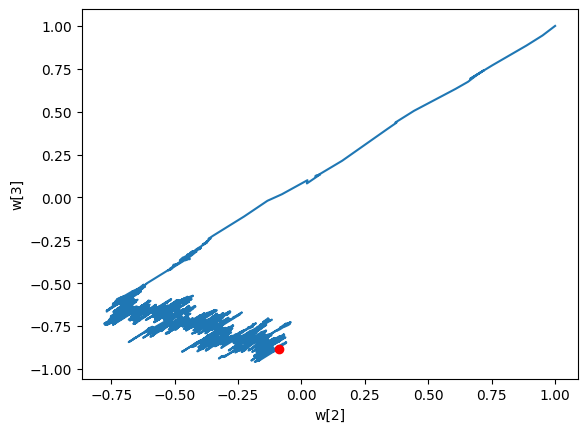

In [16]:
#모델 훈련하기
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [17]:
#모델 성능 평가
layer2.score(x_val, y_val)

0.37362637362637363

In [18]:
#검증 세트도 표준화 처리
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

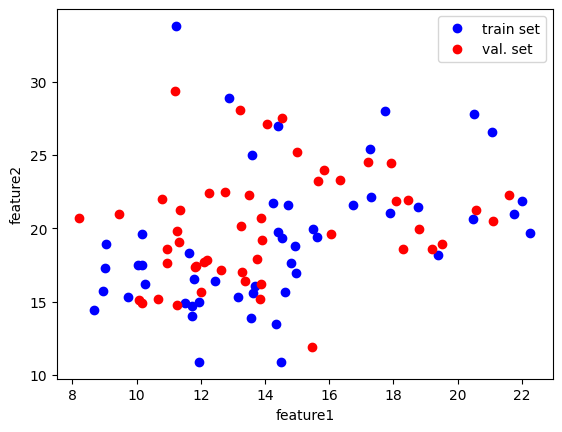

In [19]:
#훈련세트와 검증세트의 비율 확인 산점도 그리기
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(['train set', 'val. set'])
plt.show()

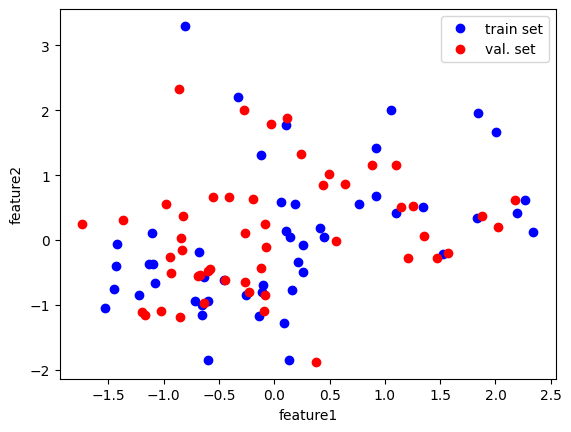

In [20]:
#전처리한 훈련세트와 검증세트의 비율 확인 산점도 그리기
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(['train set', 'val. set'])
plt.show()

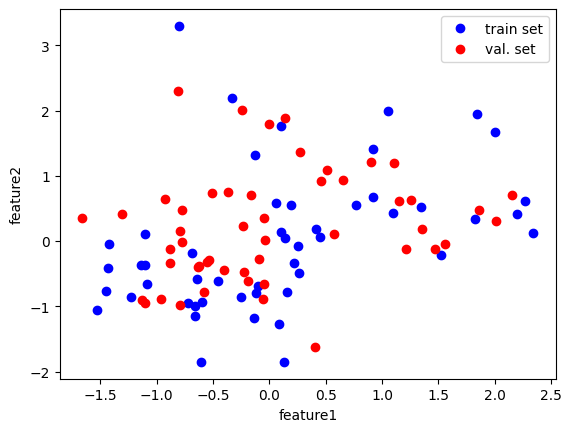

In [21]:
#올바르게 검증 세트 처리하기
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(['train set', 'val. set'])
plt.show()

In [22]:
#모델 평가하기
layer2.score(x_val_scaled, y_val)

0.967032967032967

5-2 과대적합 & 과소적합

In [23]:
#검증 손실을 기록하기 위한 변수 추가
def __init__(self, learning_rate=0.1):
  self.w = None
  self.b = None
  self.losses = []
  self.val_losses = []
  self.w_history = []
  self.lr = learning_rate

In [24]:
#검증 세트를 전달받을 수 있도록 x_val, y_val 매개변수 추가
def fit(self, x, y, epochs=100, x_val=None, y_val=None): #훈련을 위한 fit() 매서드 구현
  self.w = np.ones(x.shape[1])
  self.b = 0
  self.w_history.append(self.w.copy())
  np.random.seed(42)
  for i in range(epochs):
    loss = 0
    indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞기
    for i in indexes:
      z = self.forpass(x[i])
      a = self.activation(z)
      err = -(y[i] - a)
      w_grad, b_grad = self.backprop(x[i], err)
      self.w -= self.lr * w_grad
      self.b -= self.lr * b_grad
      self.w_history.append(self.w.copy()) #가중치를 기록
      a = np.clip(a, 1e-10, 1-1e-10) #안전한 로그 계산을 위해 클리핑한 후 손실을 누적
      loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
    self.losses.append(loss/len(y)) #에포크마다 평균 손실을 저장
    self.update_val_loss(x_val, y_val) #검증 세트에 대한 손실을 계산

In [25]:
#검증 손실 계산
def update_val_loss(self, x_val, y_val):
  if x_val is None:
    return
  val_loss = 0
  for i in range(len(x_val)):
    z = self.forpass(x_val[i])
    a = self.activation(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
  self.val_losses.append(vaL_loss/len(y))

In [26]:
#단일층 신경망 구현

class SingleLayer:
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x): #정방향 계산
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err): #역방향 계산
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100, x_val=None, y_val=None): #훈련을 위한 fit() 매서드 구현
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞기
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy()) #가중치를 기록
        a = np.clip(a, 1e-10, 1-1e-10) #안전한 로그 계산을 위해 클리핑한 후 손실을 누적
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y)) #에포크마다 평균 손실을 저장
      self.update_val_loss(x_val, y_val) #검증 세트에 대한 손실을 계산

  def predict(self, x): #예측을 위한 predict() 매서드 구현
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

  def update_val_loss(self, x_val, y_val):   #검증 손실 계산
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))

In [27]:
#모델 훈련
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

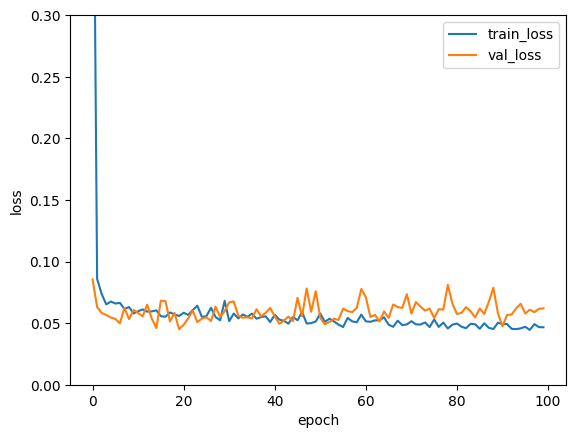

In [28]:
#손실값으로 그래프 그려 에포크 횟수 지정
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [29]:
#훈련 조기 종료
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

5-3 규제 방법을 단일층 신경망에 적용

In [51]:
#로지스틱 회귀에 규제 적용
#그레이디언트 업데이트 수식에 페널티 항 반영
def __init__(self, learning_rate=0.1, l1=0, l2=0):
  self.w = None
  self.b = None
  self.losses = []
  self.val_losses = []
  self.w_history = []
  self.lr = learning_rate
  self.l1 = l1
  self.l2 = l2

In [52]:
#역방향 계산을 수행할 때 그레이디언트에 페널티 항의 미분값을 더함
def fit(self, x, y, epochs=100, x_val=None, y_val=None): #훈련을 위한 fit() 매서드 구현
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞기
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w # 그레이디언트에서 페널티 항의 미분값을 더함
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy()) #가중치를 기록
        a = np.clip(a, 1e-10, 1-1e-10) #안전한 로그 계산을 위해 클리핑한 후 손실을 누적
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y)) #에포크마다 평균 손실을 저장
      self.update_val_loss(x_val, y_val) #검증 세트에 대한 손실을 계산

In [57]:
#로지스틱 손실 함수 계산에 페널티 항 추가
def reg_loss(self):
  return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

In [58]:
#reg_loss()를 호출하도록 수정
def update_val_loss(self, x_val, y_val):   #검증 손실 계산
  if x_val is None:
    return
  val_loss = 0
  for i in range(len(x_val)):
    z = self.forpass(x_val[i])
    a = self.activation(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
  self.val_losses.append(val_loss/len(y_val)+ self.reg_loss())

In [59]:
#단일층 신경망에 규제 추가항 구현

class SingleLayer:
  def __init__(self, learning_rate=0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x): #정방향 계산
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err): #역방향 계산
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100, x_val=None, y_val=None): #훈련을 위한 fit() 매서드 구현
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞기
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w # 그레이디언트에서 페널티 항의 미분값을 더함
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy()) #가중치를 기록
        a = np.clip(a, 1e-10, 1-1e-10) #안전한 로그 계산을 위해 클리핑한 후 손실을 누적
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y)) #에포크마다 평균 손실을 저장
      self.update_val_loss(x_val, y_val) #검증 세트에 대한 손실을 계산

  def predict(self, x): #예측을 위한 predict() 매서드 구현
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

  def reg_loss(self): #로지스틱 손실 함수 계산에 페널티 항 추가
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

  def update_val_loss(self, x_val, y_val):   #검증 손실 계산
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val)+ self.reg_loss())

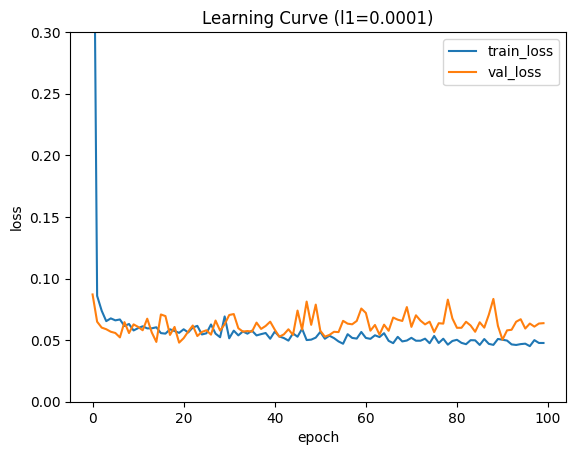

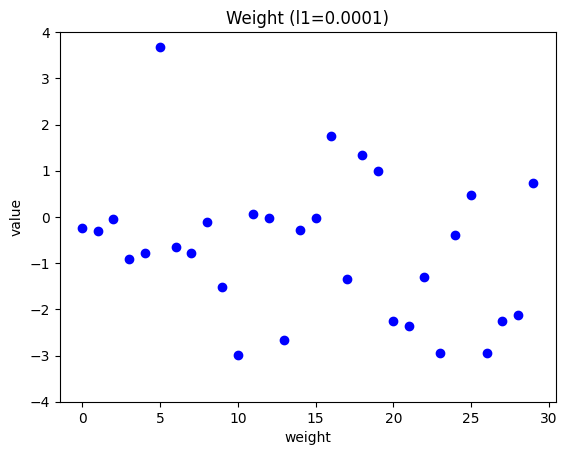

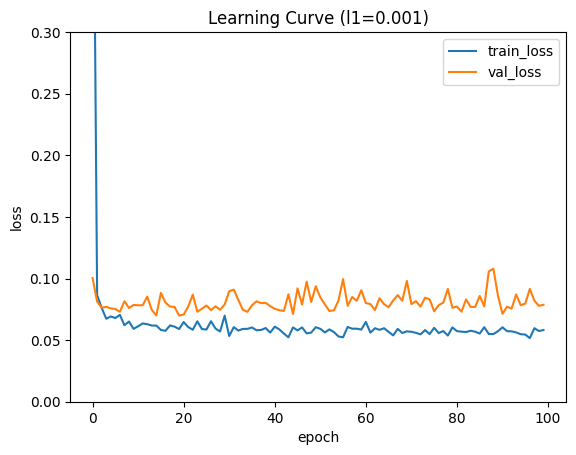

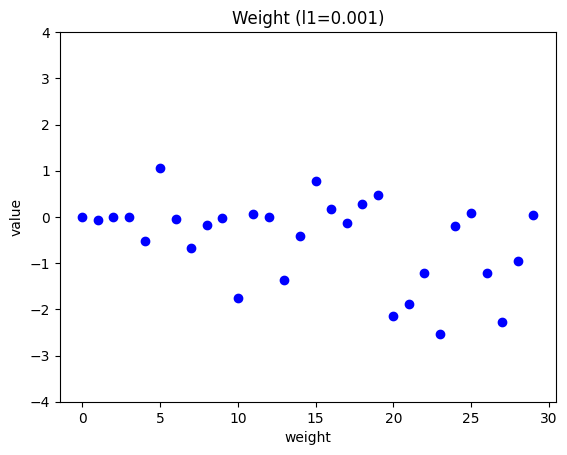

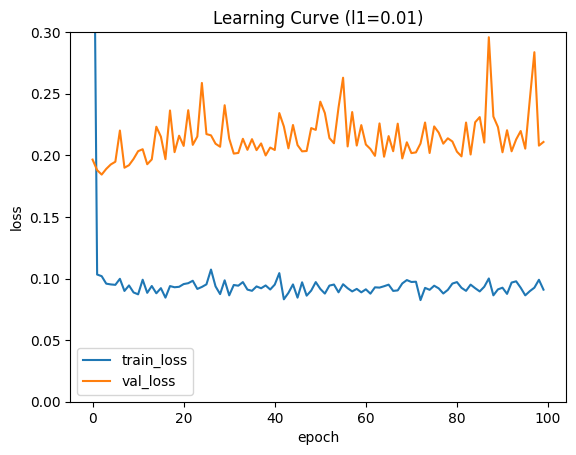

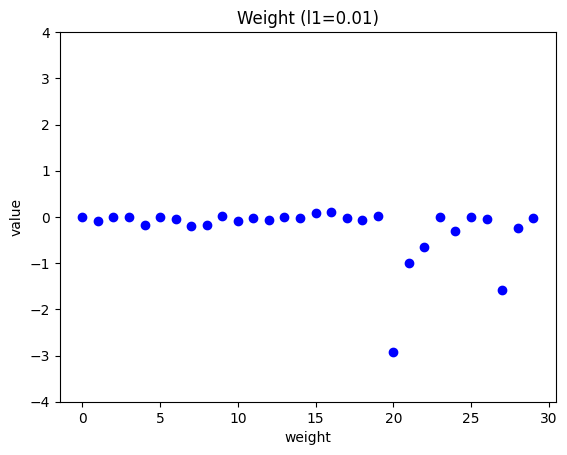

In [64]:
#Cancer 데이터 세트에 L1 규제 적용
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1=l1)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [62]:
#모델 성능 확인
layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

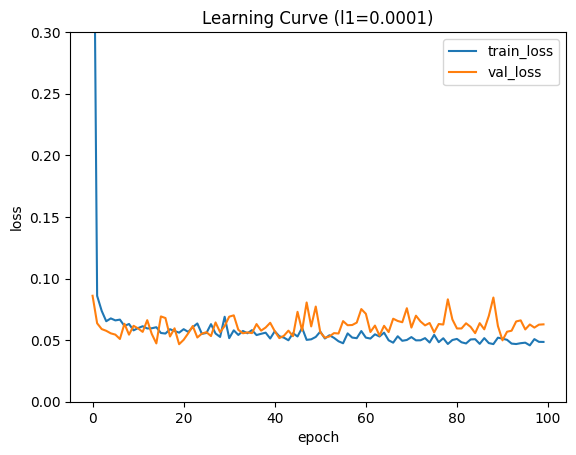

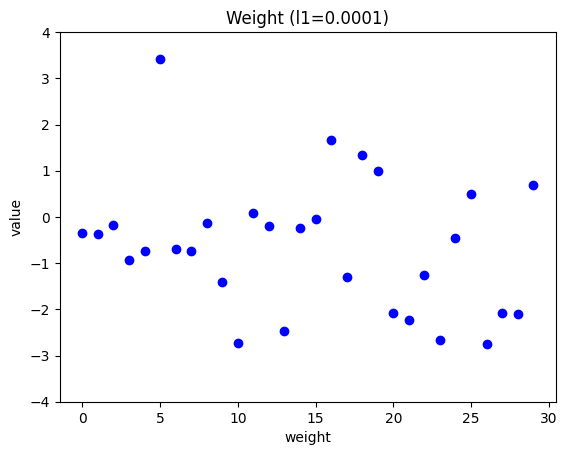

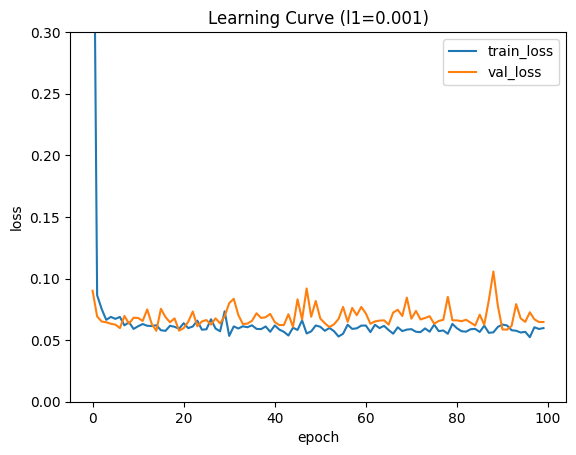

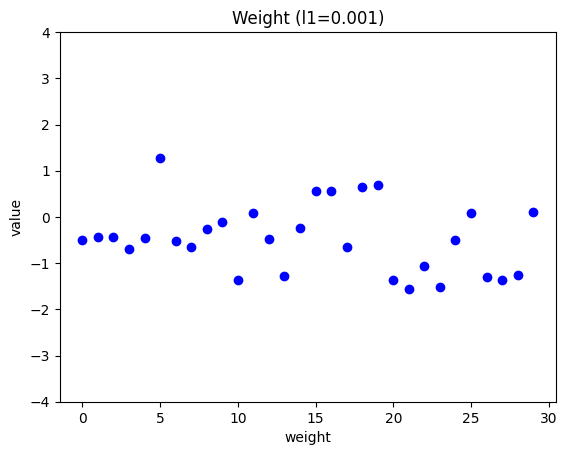

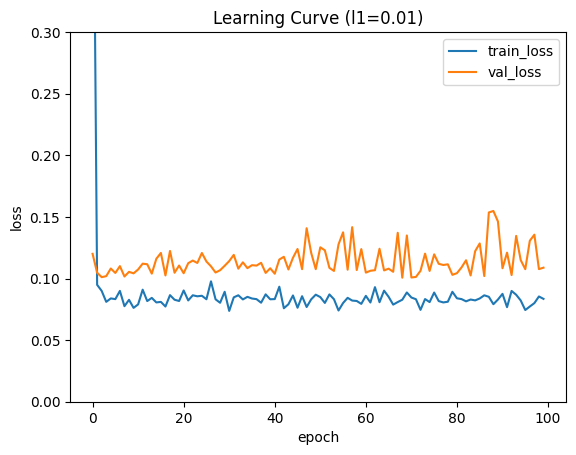

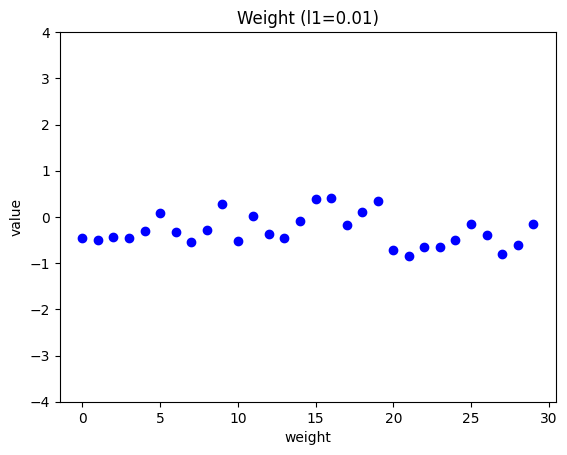

In [65]:
#Cancer 데이터 세트에 L2 규제 적용
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
  lyr = SingleLayer(l2=l2)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={})'.format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [66]:
#모델 성능 평가
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.978021978021978

In [68]:
np.sum(layer6.predict(x_val_scaled) == y_val) #91개의 데이터 중 89개를 정확하게 예측

89

In [69]:
#SGDClassifier에서 규제 사용하기
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.978021978021978

5-4 교차 검증

In [70]:
#k-폴드 교차 검증
validation_scores = []

In [73]:
#k-폴드 교차 검증 구현
k = 10
bins = len(x_train_all) // k

for i in range(k):
  start = i*bins
  end = (i+1)*bins
  val_fold = x_train_all[start:end]
  val_target = y_train_all[start:end]

  train_index = list(range(0, start))+list(range(end, len(x_train_all)))
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  train_mean = np.mean(train_fold, axis=0)
  train_std = np.std(train_fold, axis=0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled = (val_fold - train_mean) / train_std

  lyr = SingleLayer(l2=0.01)
  lyr.fit(train_fold_scaled, train_target, epochs=50)
  score =lyr.score(val_fold_scaled, val_target)
  validation_scores.append(score)

print(np.mean(validation_scores))

0.9711111111111113


In [78]:
#사이킷런으로 교차 검증 실행
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))

0.850096618357488


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

In [79]:
#전처리 단계 포함해 교차 검증을 수행
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

In [81]:
print(np.mean(scores['train_score']))

0.9875478561631581
